# Marketing & Retail Analytics Project

## Import Libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

# Command to tell Python to actually display the graphs
%matplotlib inline

# this library contains a large number of probability distributions as well as a growing library of statistical functions
import scipy.stats as stats  

# set working directory
import os
os.getcwd()
os.chdir('C:\\Users\\Dubey\\Downloads')

In [9]:
# this two lines of code is just to increase the size of the display
from IPython.core.display import display, HTML 
display(HTML('<style>.container { width:99.9% !important; }<\style>'))

# set column number to see all columns
pd.set_option('display.max_columns', 35)

C:\Users\Dubey\AppData\Local\Temp\ipykernel_13184\1765676117.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Problem Statement:

An automobile parts manufacturing company has collected data of transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your magical data science skills to provide them with suitable insights about their data and their customers.

## Data Dictionary:

* ORDERNUMBER : Order Number

* CUSTOMERNAME : customer

* QUANTITYORDERED : Quantity ordered

* PHONE : Phone of the customer

* PRICEEACH : Price of Each item

* ADDRESSLINE1 : Address of customer

* ORDERLINENUMBER : order line

* CITY : City of customer

* SALES : Sales amount

* POSTALCODE : Postal Code of customer

* ORDERDATE : Order Date

* COUNTRY : Country customer

* DAYS_SINCE_LASTORDER : Days_ Since_Lastorder

* CONTACTLASTNAME : Contact person customer

* STATUS : Status of order like Shipped or not

* CONTACTFIRSTNAME : Contact person customer

* PRODUCTLINE : Product line – CATEGORY

* DEALSIZE : Size of the deal based on Quantity and Item Price

* MSRP : Manufacturer's Suggested Retail Price

* PRODUCTCODE : Code of Product

In [2]:
# READ DATASET
df = pd.read_excel('Sales_Data.xlsx')

In [8]:
# TOP ROWs OF DATASET
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [11]:
# Data Type of Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [13]:
# Rows and Columns
df.shape

(2747, 20)

In [22]:
# Statistical Summary
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098951,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042548,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [17]:
# nulls in data set
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [18]:
# duplicate in data set
df.duplicated().sum() 

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


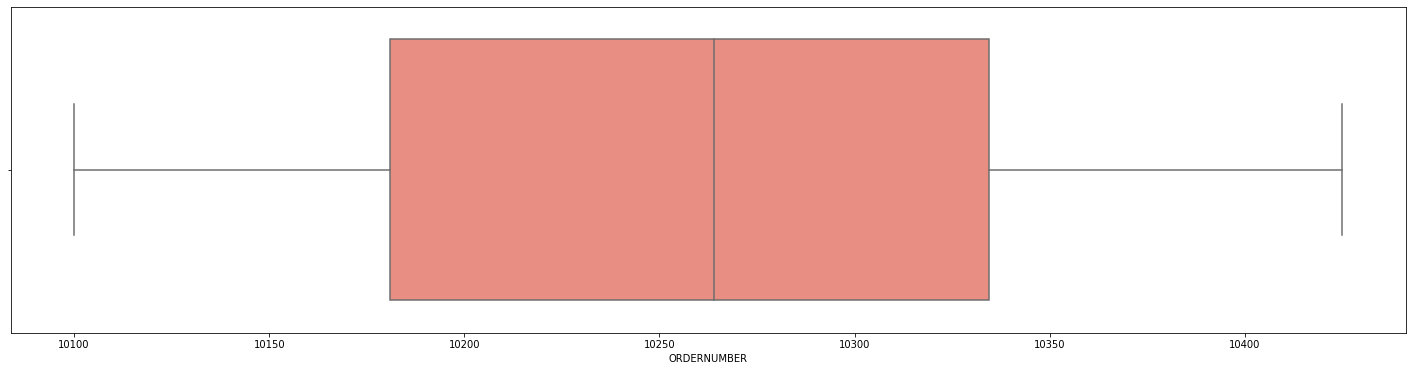

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


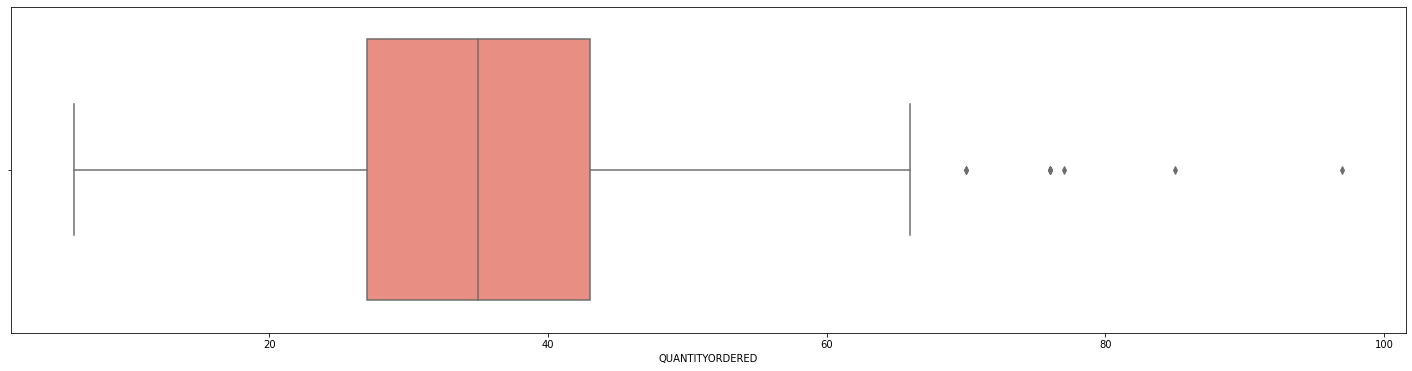

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


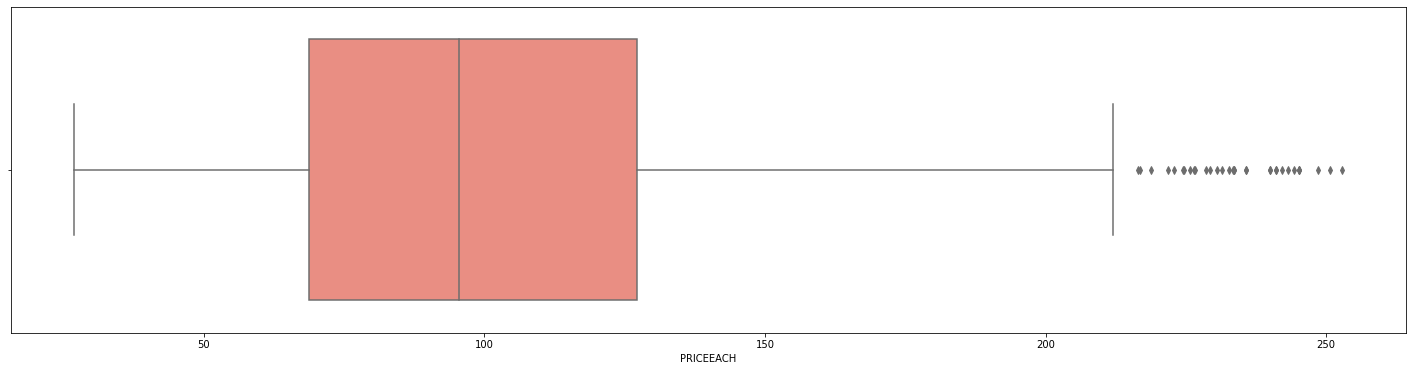

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


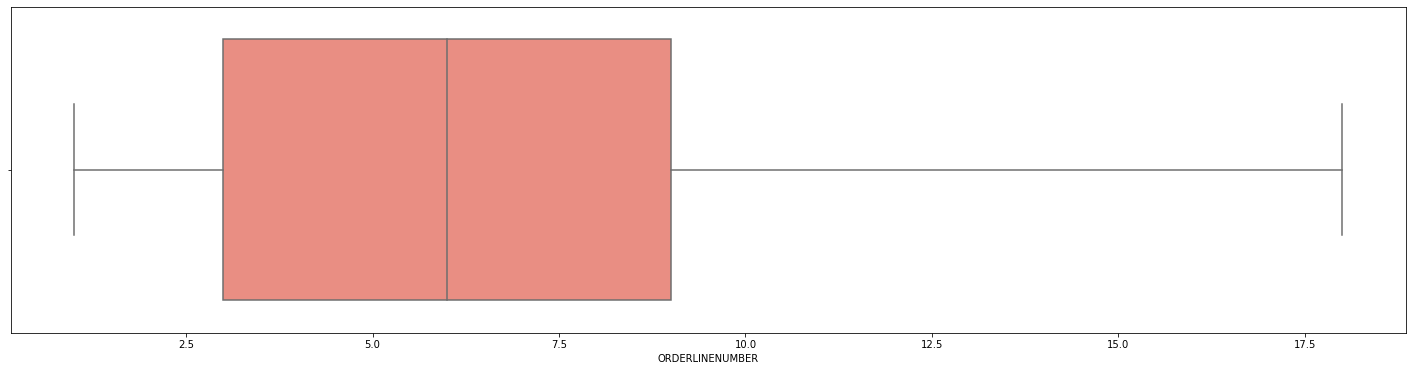

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


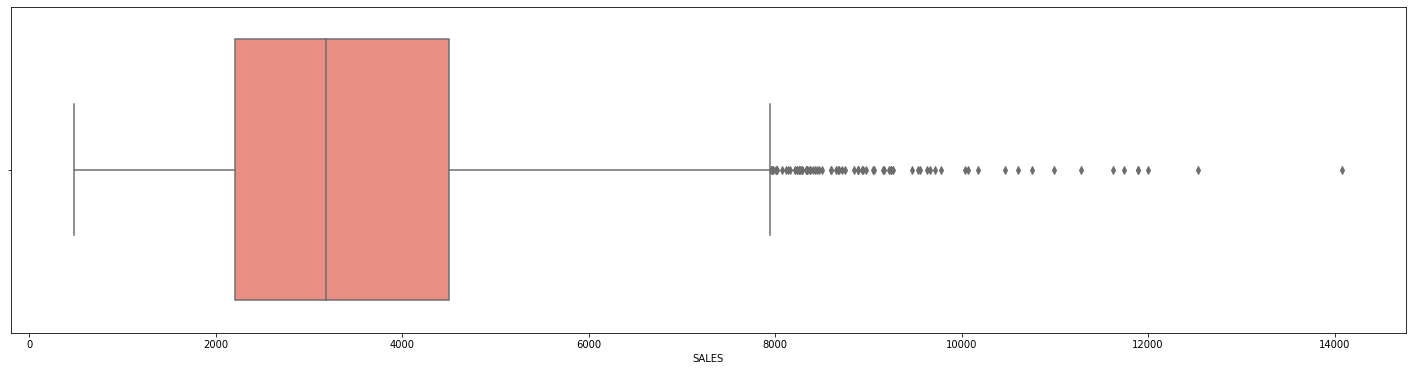

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


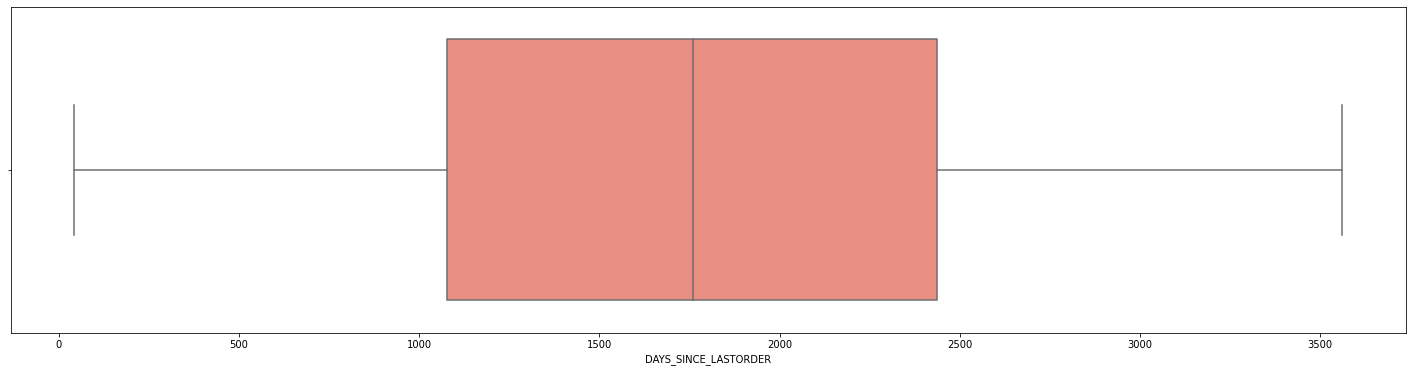

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


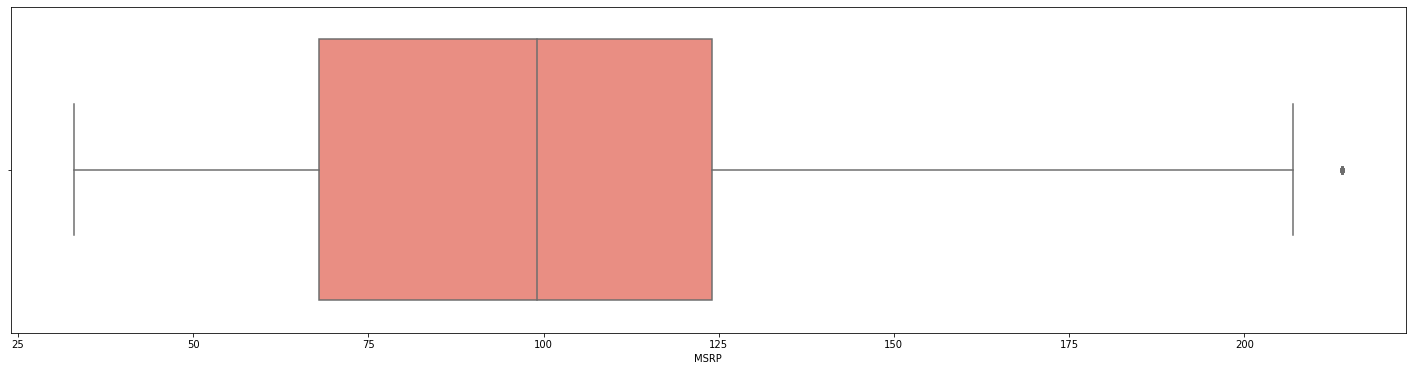

In [39]:
# Boxplot
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        plt.figure(figsize=(25,6))
        sns.boxplot(df[column], color='Salmon')
        plt.show()    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


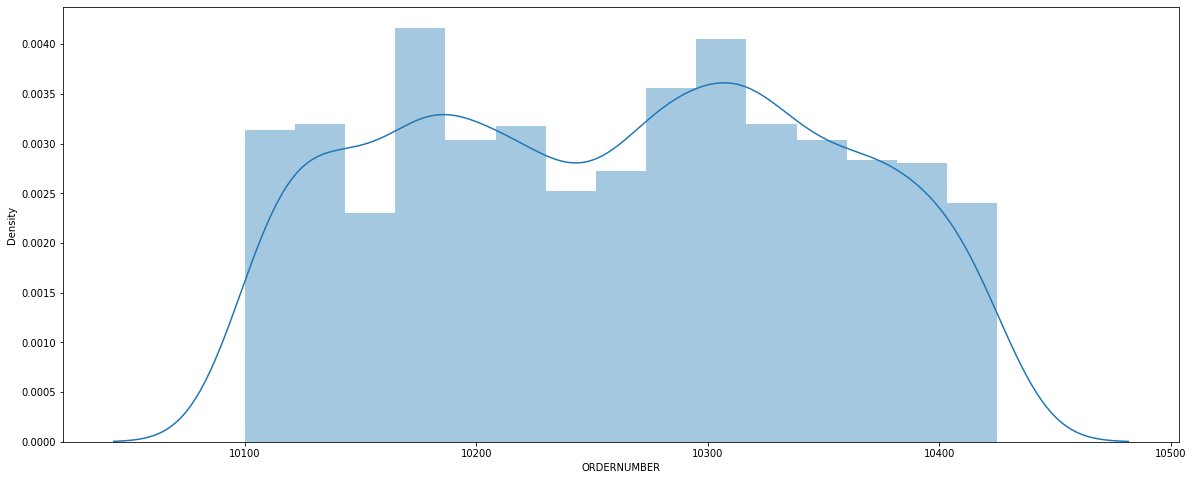

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


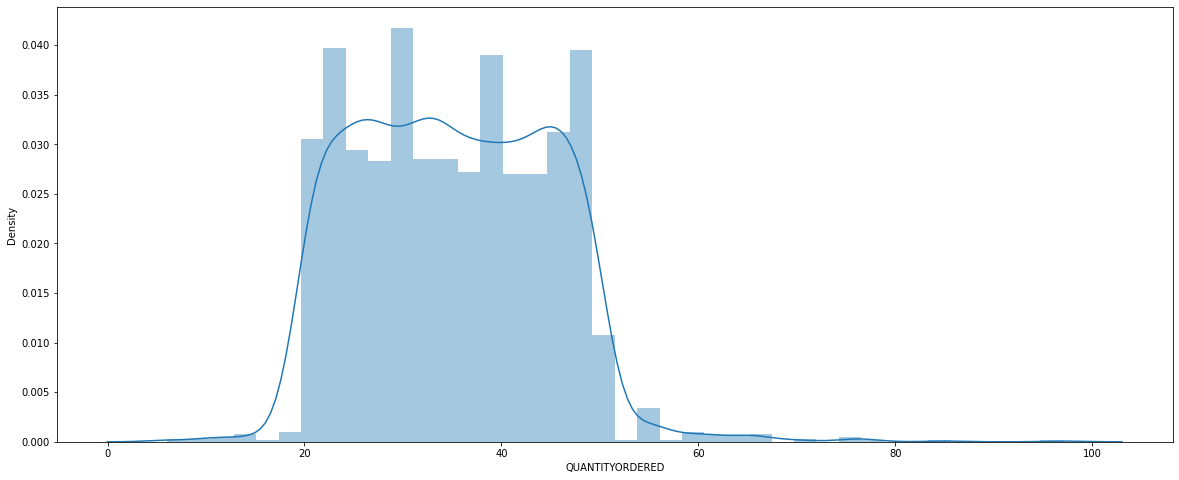

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


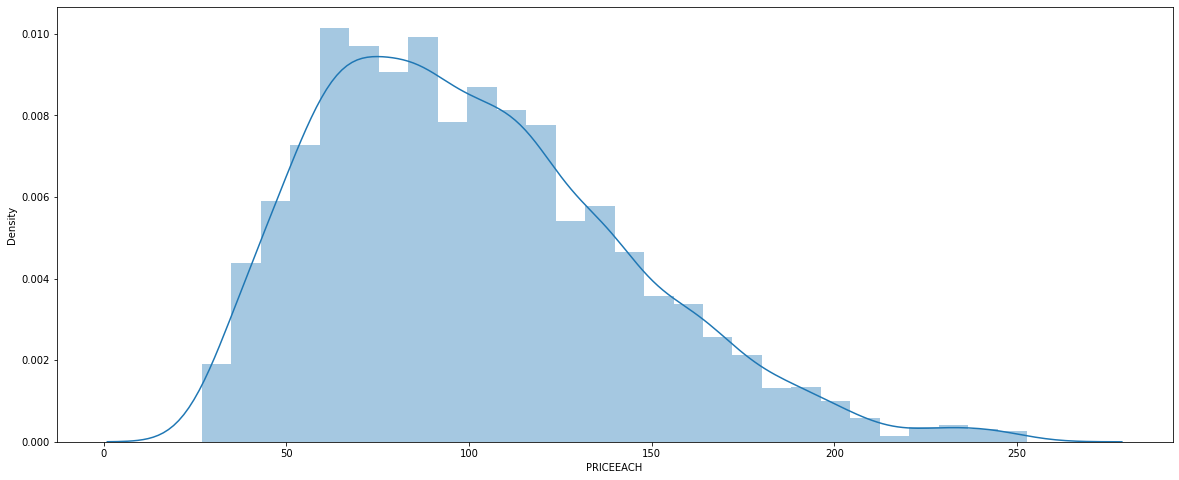

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


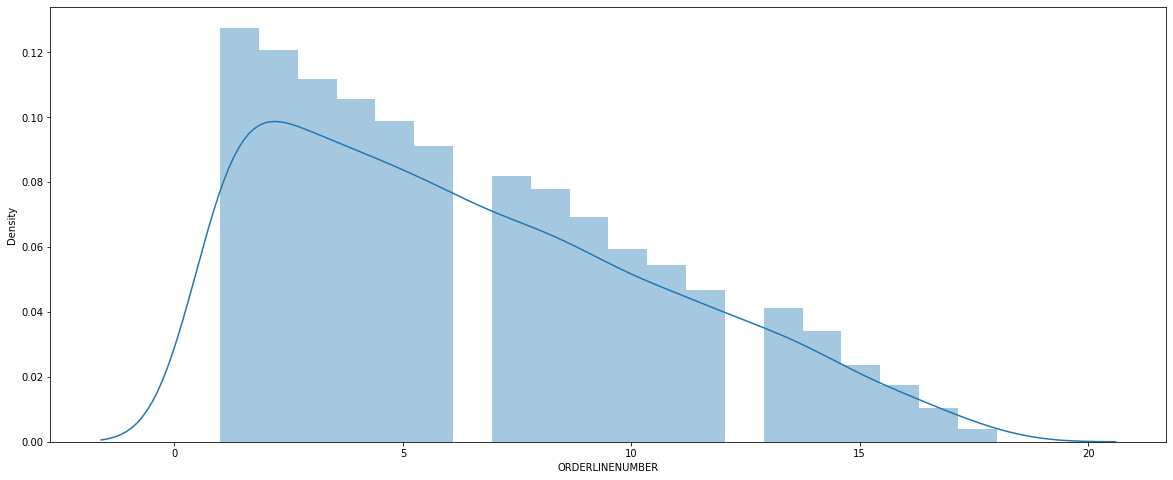

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


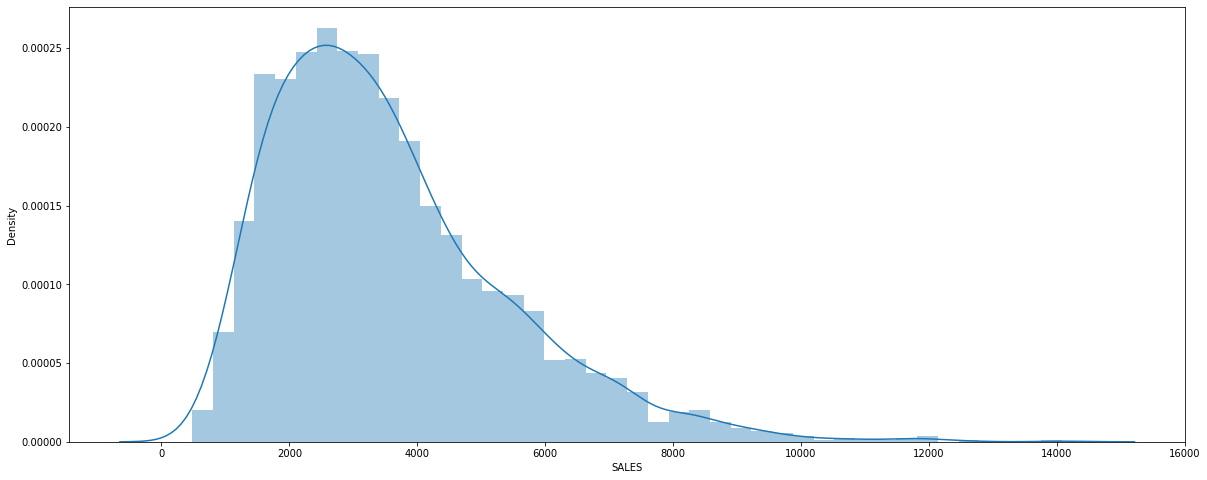

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


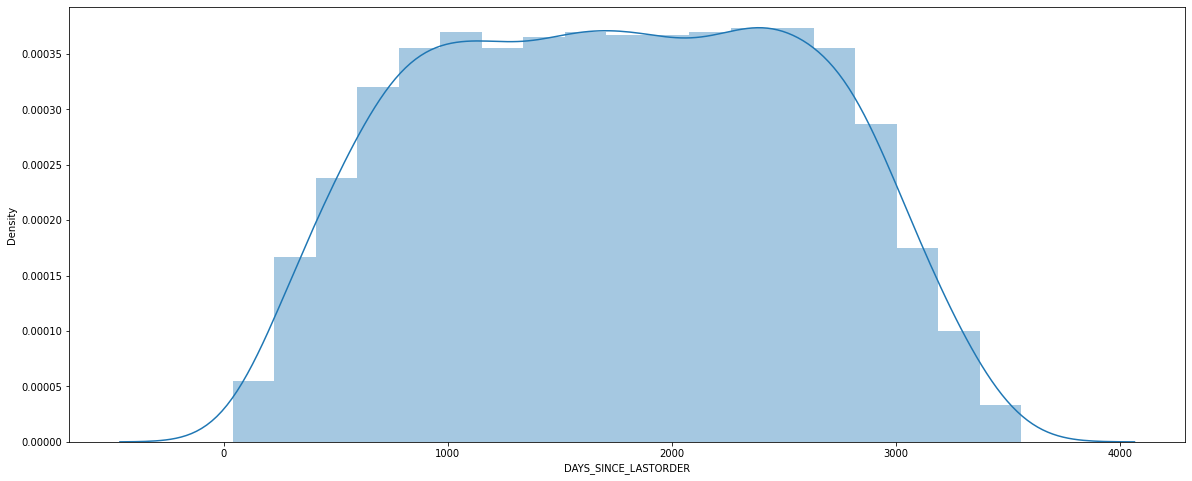

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


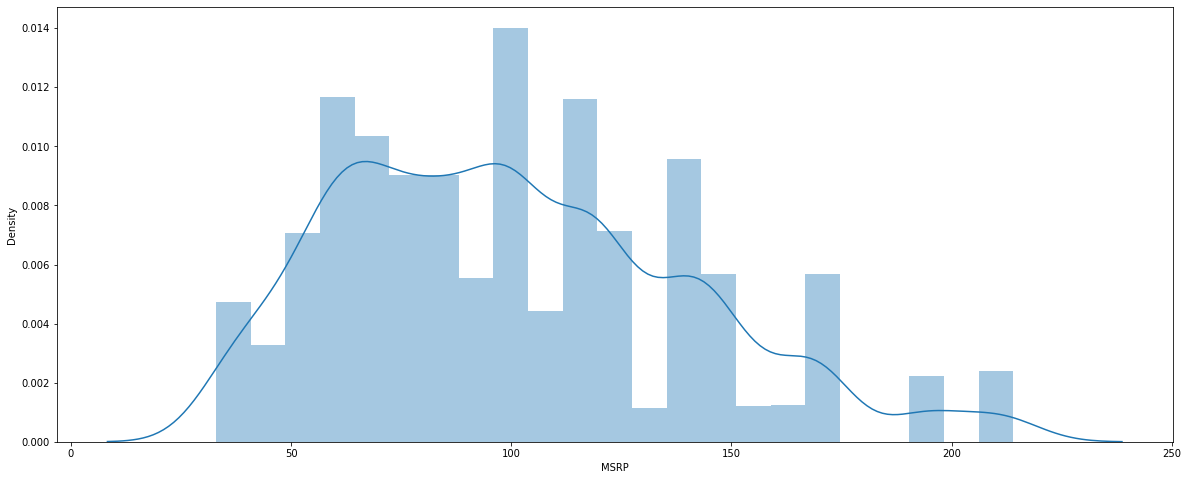

In [41]:
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        plt.figure(figsize=(20,8))
        sns.distplot(df[column])
        plt.show()

In [49]:
df[df.QUANTITYORDERED >=70].sort_values(by='QUANTITYORDERED',ascending=False).head(15)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
399,10405,97,93.280000,5,9048.16,2020-04-14,447,Shipped,Classic Cars,115,S12_4675,Mini Caravy,88.60.1555,"24, place Kluber",Strasbourg,67000,France,Citeaux,Frederique,Large
2511,10401,85,88.750000,10,7543.75,2020-04-03,2570,On Hold,Planes,99,S700_2466,Tekni Collectables Inc.,2015559350,7476 Moss Rd.,Newark,94019,USA,Brown,William,Large
2614,10401,77,92.000000,9,7084.00,2020-04-03,2673,On Hold,Planes,80,S700_3167,Tekni Collectables Inc.,2015559350,7476 Moss Rd.,Newark,94019,USA,Brown,William,Large
571,10407,76,185.300000,2,14082.80,2020-04-22,611,On Hold,Vintage Cars,170,S18_1749,The Sharp Gifts Warehouse,4085553659,3086 Ingle Ln.,San Jose,94217,USA,Frick,Sue,Large
1656,10407,76,94.500000,6,7182.00,2020-04-22,1696,On Hold,Classic Cars,90,S24_2766,The Sharp Gifts Warehouse,4085553659,3086 Ingle Ln.,San Jose,94217,USA,Frick,Sue,Large
1930,10405,76,154.469737,3,11739.70,2020-04-14,1978,Shipped,Classic Cars,140,S24_3856,Mini Caravy,88.60.1555,"24, place Kluber",Strasbourg,67000,France,Citeaux,Frederique,Large
1609,10412,70,121.400000,10,8498.00,2020-05-03,1638,Shipped,Trucks and Buses,127,S24_2300,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Large
1931,10419,70,132.000000,8,9240.00,2020-05-17,1946,Shipped,Classic Cars,140,S24_3856,Salzburg Collectables,6562-9555,Geislweg 14,Salzburg,5020,Austria,Pipps,Georg,Large
